Command run to generate data:

```bash
python app/process.py \
    --input_dir=/media/ssd/drinnenb/202008-settling \
    --output_dir=/media/ssd/drinnenb/202008-settling-output \
    --recording=20200822TEST:2p15Hz-000 \
    --preprocess \
    --settle_time=5 \
    --artefact_shift=5 \
    --artefact_buffer=2
```

In [1]:
base_dir = '/media/ssd/drinnenb/202008-settling-output/20200822TEST/2p15Hz-000'
nsamples = 5

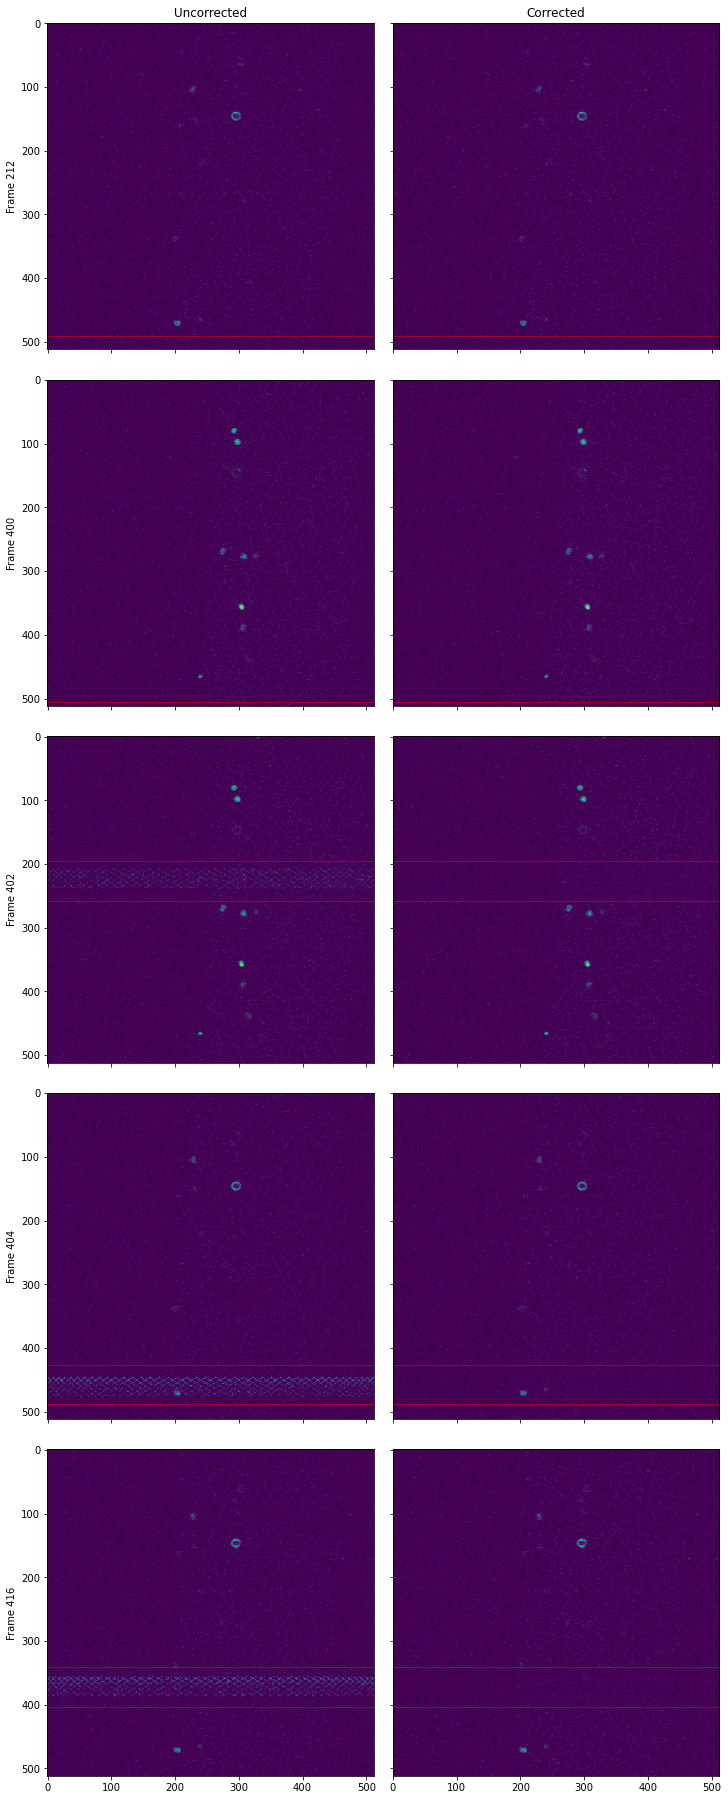

In [5]:
import h5py
import matplotlib.pyplot as plt
import pandas as pd

artefact_h5 = f'{base_dir}/output/artefact.h5'
uncorrected_h5 = f'{base_dir}/hdf5/uncorrected/uncorrected.h5'
corrected_h5 = f'{base_dir}/hdf5/data/data.h5'

artefact = pd.read_hdf(artefact_h5, 'data')

with h5py.File(uncorrected_h5, 'r') as hf:
    uncorrected = hf['data'][()]

with h5py.File(corrected_h5, 'r') as hf:
    corrected = hf['data'][()]
    
samples = artefact.sample(nsamples).reset_index().sort_values(['frame', 'z_plane'])

ncols = 2
_, axes = plt.subplots(nsamples, ncols, figsize=(5*ncols, 5*nsamples), 
                       sharex=True, sharey=True,
                       constrained_layout=True) 

axes[0][0].set_title('Uncorrected')
axes[0][1].set_title('Corrected')
for row, s in enumerate(samples.itertuples()):
    axes[row][0].set_ylabel('Frame %d' % s.frame)
    axes[row][0].imshow(uncorrected[s.frame, s.z_plane])
    axes[row][0].axhline(s.y_min, c='r', lw=0.5)
    axes[row][0].axhline(s.y_max, c='r', lw=0.5)
    axes[row][1].imshow(corrected[s.frame, s.z_plane])
    axes[row][1].axhline(s.y_min, c='r', lw=0.5)
    axes[row][1].axhline(s.y_max, c='r', lw=0.5)